# Lab 1: Environment Setup & Data Handling
#### COSC 410: Spring 2024, Colgate University

The purpose of this portion of the lab is to get you familiar loading and analyzing data in a Python notebook. In particular, we will explore the basics of NumPy and Pandas by exploring of some public policy datasets from the Chicago Data Portal. Some of the examples below are adapted from *Machine Learning with Python Cookbook* by Chris Albon, the *Overview of Colab* by Google, and the *Python Tutorial With Google Colab* from Stanford University's CS231n course by Justin Johnson, Volodymyr Kuleshov, and Isaac Caswell. This notebook is adapted from Prof. [Noah Apthorpe](https://www.cs.colgate.edu/~napthorpe/index.html)'s COSC410.

This notebook involves running provided code to become familiar with the libraries. Don't rush through these parts just because the code already works. Instead, make sure you understand what is happening and how to replicate it if you were given similar data without the provided code. Part 4 involves writing your own code to explore a dataset.


# 0. Python Notebooks

### 0.1 Cells
A notebook is a list of cells. Cells contain either explanatory text or executable code and its output. Click a cell to select it.

### 0.2 Code cells
Below is a **code cell**. Click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the row at the top of the notebook;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Run** menu.

Execute the following cell to run the "Hello World" program.

In [1]:
print("Hello, World")

Hello, World


You can define functions and variables in code cells. Once you have run the cell, the functions and variables are available to any cell in the notebook, *even cells **above** where the variables or functions were defined.* This can be a source of bugs if you start running cells out of order and forget that a later cell overwrote a function or variable value. 

**Inportant:** If you want to reset the notebook and remove all defined values, use `%reset` in a code cell.

### 0.3 Text cells
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see this [markdown
guide](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
. Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$

### 0.4 Adding and moving cells
You can add new cells by using the **+** with the box above or below it (or in the menu). You can toggle the cell between Markdown and Code using the drop down menu. 

You can move a cell by selecting it and clicking the arrows for **cell up** or **cell down** in the toolbar at the top right of the cell. 

Consecutive cells can be selected by "lasso selection" by dragging from outside one cell and through the group.  Non-adjacent cells can be selected concurrently by clicking one and then holding down Cmd/Ctrl while clicking another.  Similarly, using Shift instead of Cmd/Ctrl will select all intermediate cells.

# 1. NumPy

NumPy is the foundation of the Python machine learning stack. It allows for efficient operations on the data structures often used in machine learning.

This section covers the most common NumPy operations you are likely to run into when preparing data for ML

First we will make sure NumPy is imported

In [1]:
import numpy as np

### 1.1 Creating an Array

A NumPy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the **rank** of the array; the **shape** of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [3]:
# Create a rank 1 array
a = np.array([1, 2, 3]) 
print(a)

# Change an element of the array
a[0] = 5                 
print(a)  

[1 2 3]
[5 2 3]


We can create higher-rank arrays from lists of lists. This cell creates an array with two rows and three columns.

In [4]:
# Create a rank 2 array
b = np.array([[1,2,3],[4,5,6]])   
print(b)

[[1 2 3]
 [4 5 6]]


Numpy also provides many functions to create arrays:

In [5]:
# Create an array of all zeros
a = np.zeros((2,2))  
print(a)

[[0. 0.]
 [0. 0.]]


In [6]:
 # Create an array of all ones
b = np.ones((1,2))  
print(b)

[[1. 1.]]


In [7]:
 # Create a constant array
c = np.full((4,4), 7)
print(c)

[[7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]
 [7 7 7 7]]


In [8]:
# Create an array filled with random values between 0 and 1
e = np.random.random((2,3))
print(e)

[[0.78561805 0.3579907  0.37400825]
 [0.21400914 0.15267915 0.36507371]]


### 1.2 Selecting Elements in an Array
You often need to select one or more elements in an array. Fortunately, NumPy arrays make that easy. Like most things in Python, NumPy arrays are zero-indexed, meaning that the index of the first element is 0, not 1. With that caveat, NumPy offers a wide variety of methods for selecting (indexing and slicing) individual elements or groups of elements in arrays. Some examples are shown below:

In [9]:
# create a 1D array
array1D = np.array([1, 2, 3, 4, 5, 6])

In [10]:
# select the third element of a 1D array
array1D[2]

3

In [11]:
# select the last element of a 1D array
array1D[-1]

6

In [12]:
# Select all elements of a 1D array
array1D[:]

array([1, 2, 3, 4, 5, 6])

In [13]:
# select everything up to and including the third element of a 1D array
array1D[:3]

array([1, 2, 3])

In [14]:
# create a 2D array
array2D = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [15]:
# select second row, second column of a 2D array
array2D[1,1]

5

In [16]:
# select the first two rows and all columns of a 2D array
array2D[:2, :]

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
# select all rows and the second column of a 2D array
array2D[:, 1:2]

array([[2],
       [5],
       [8]])

These techniques generalize beyond 2D arrays to arbitrary dimensions.

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [18]:
a = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9,10,11,12]])
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


In [19]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


Boolean array indexing lets you pick out arbitrary elements of an array. This type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [20]:
a = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [21]:
# We use boolean array indexing to construct a 1D array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

[3 4 5 6]


In [22]:
# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]


### 1.4 Describing an Array

If it often helpful to be able to describe the shape, size, and dimensions of a NumPy array. The shape, size, and ndim functions allow you to do this.

In [23]:
# create array
array = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

# view number of rows and columns
print(array.shape)

(3, 4)


In [24]:
# view number of elements (rows * columns)
print(array.size)

12


In [25]:
# view number of dimensions (rank)
print(array.ndim)

2


Although this might seem basic, it is frequently valuable to check the shape and size of an array before further calculations (e.g. to make sure it is the right shape for input into a ML algorithm) or simply as a gut check after performing an operation.

### 1.5 Math with Arrays
When performing operations involving an array and a scaler (single number not in an array), NumPy allows you to use the built-in math operators +, -, * and / through a process called "broadcasting." For example, suppose you want to add 1000 to all elements of an array: 

In [26]:
# create array
array = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# add 1000 to all elements
new_array = array + 1000

# print the result
print(new_array)

[[1001 1002 1003]
 [1004 1005 1006]
 [1007 1008 1009]]


You might have expected a TypeError, because this involved adding an Array type to an Integer type. However, NumPy automatically broadcasts the operation with the single integer (or float) over all elements of the array. A common preprocessing operation involves adding 1 to arrays with very small values to avoid doing math on small fractions. 

When performing operations involving only arrays, you should use the NumPy methods with the operation name. These methods all operate **elementwise** (meaning that they add/subtract/multiply/divide the elements in corresponding positions in the operands

In [27]:
# create two arrays
array1 = np.array([[1, 2],
                   [3, 4]])

array2 = np.array([[10, 20],
                   [30, 40]])

# operation examples

In [28]:
print( np.add(array1, array2) )

[[11 22]
 [33 44]]


In [29]:
print( np.subtract(array1, array2) )

[[ -9 -18]
 [-27 -36]]


In [30]:
print( np.multiply(array1, array2) )

[[ 10  40]
 [ 90 160]]


If you are familiar with vector calculus or linear algrabra, there are also vector and matrix operation functions in NumPy. For example, you can calculate the dot product of two 1D arrays (vectors). You can also calculate the matrix product of two arrays as long as they have compatible shapes.

In [31]:
# Create a vector and a matrix
vector = np.array([1,2])
matrix = np.array([[1, 2], [3, 4]])

In [32]:
# dot product
print( vector.dot(vector) )

5


In [33]:
# matrix multiply
print( np.matmul(matrix, matrix) )

[[ 7 10]
 [15 22]]


### 1.7 Basic Statistics

NumPy also provides functions for computing basic statistics about data arrays. It is often helpful to inspect these statistics before ML training to better understand your data. 

In [34]:
# create array 
arr =  np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

# find maximum element
np.max(arr)

9

In [35]:
# find minimum element
np.min(arr)

1

In [36]:
# find maximum element in each column
np.max(arr, axis=0)

array([7, 8, 9])

In [37]:
# find maximum element in each row
np.max(arr, axis=1)

array([3, 6, 9])

In [38]:
# find mean across entire matrix
np.mean(arr)

5.0

In [39]:
# find the mean value in each column
np.mean(arr, axis=0)

array([4., 5., 6.])

In [40]:
# find the mean value in each row
np.mean(arr, axis=1)

array([2., 5., 8.])

In [41]:
# find variance across entire matrix
np.var(arr)

6.666666666666667

In [42]:
# find standard deviation across entire matrix
np.std(arr)

2.581988897471611

### 1.8 Reshaping Arrays

Machine learning algorithms often expect input data in a particular shape or dimensionality. NumPy makes it easy to change the shape (number of rows and columns) of an array without changing the element values.

In [43]:
# create 4x3 array
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9],
                [10, 11, 12]])

print(arr)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [44]:
# reshape matrix into 2x6 array
arr.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

The reshape() function allows us to restructure an array so that we maintain the same data but it is organized as a different number of rows and columns. The only requirement is that the shape of the original and new array contain the same number of elements (i.e., the same size). We can see the size of an array using the size field:

In [45]:
arr.size

12

One useful argument to reshape is -1, which effectively means “as many as needed,” so reshape(1, -1) means one row and as many columns as needed:

In [46]:
arr.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

Finally, if we provide one integer, reshape will return a 1D array of that length. The flatten() function will also do the same thing. 

In [47]:
arr.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [48]:
arr.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Occasionally, you may want to transpose an array. Transposing is a common operation in linear algebra where the column and row indices of each element are swapped. For a 2D array, this turns the rows into columns (and vice versa). Transposition is performed in NumPy using the T field:

In [49]:
arr.T

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

### 1.8 Other Array Operations

NumPy provides many more built-in functions and methods for performing operations on data arrays. Descriptions are all available in the NumPy documentation. 

**Important Tip:** If you are ever considering writing a loop to process a data array one element at a time, there are probably more efficient methods using array operations and array broadcasting. Stack Overflow is very helpful for finding these tricks.

# 2. Pandas

The Pandas library simplifies the import and manipulation of labeled data arrays (arrays where the rows and columns have names). 

The fundamental data types in Pandas are Series (for 1D data), Dataframe (for 2D data) and Panel (for 3D and higher dimensional data). Fortunately, many of the NumPy functions that you learned in the previous section also work on Pandas datatypes or have corresponding Pandas versions. 

This section provides examples of some common Pandas operations you are likely to run into when preparing data for ML.




In [2]:
# load library
import pandas as pd

### 2.1 Loading (Importing) Data

Pandas lets you easily import data from CSV, Excel, and JSON files. Let's explore the cta-ridership.csv dataset from the Chicago Data Portal with information about rides on the Chicago "L" system. Let's import the data into the notebook.

In [51]:
df = pd.read_csv('cta-ridership.csv')

Use the `head()` method to view the first 5 rows of the data. This is useful to start getting a sense of the dataset

In [52]:
print(df.head(5))

   station_id       stationname        date daytype  rides
0       41280    Jefferson Park  12/22/2017       W   6104
1       41000  Cermak-Chinatown  12/18/2017       W   3636
2       40280      Central-Lake  12/02/2017       A   1270
3       40140   Dempster-Skokie  12/19/2017       W   1759
4       40690          Dempster  12/03/2017       U    499


### 2.2 Basic Data Exploration

Just from looking at the first 5 rows, we can get an understanding of the type of the data.  There's a station identifier and name, a date on which the statistic takes place, the day type, and the number of rides for that date.

It's not immediately clear what the daytype means. Take a look at the description of the dataset here:
https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f. **What do W, A, and U represent?**

We can then explore some basic characteristics of the data, including the shape of the dataset and basic statistics about the columns. This basic exploration allows us to spot potential outliers and mistakes in the data.

In [53]:
print(df.shape)

(1028040, 5)


The data has 1028040 rows and 5 columns.

In [54]:
print(df.describe())

         station_id         rides
count  1.028040e+06  1.028040e+06
mean   4.076423e+04  3.247045e+03
std    4.477007e+02  3.201788e+03
min    4.001000e+04  0.000000e+00
25%    4.037000e+04  1.065000e+03
50%    4.076000e+04  2.225000e+03
75%    4.115000e+04  4.267000e+03
max    4.170000e+04  3.632300e+04


We notice that there is a station with no rides (minimum is zero!). Also, the station with the maximum number of rides appears to be about 10x the mean and median. Let's have a look at what station that is.

Fortunately, Pandas allows to select a single column from the data by indexing using the name of the column. For example `df['rides']` will give us just the rides column.

In [55]:
# Find the station with the most rides using Boolean array indexing. 
# This is a tricky line of code, make sure you understand what's going on before you proceed
print( df[ df['rides'] == np.max(df['rides']) ].head(1) )

        station_id         stationname        date daytype  rides
825568       41320  Belmont-North Main  06/28/2015       U  36323


We can also find the stations with 0 rides on particular days:

In [56]:
# find stations/day combos with 0 rides 
zero = df[df['rides'] == 0]

# display 5 of them
print(zero.head(5))

     station_id      stationname        date daytype  rides
23        40200  Randolph/Wabash  12/25/2017       U      0
110       40640   Madison/Wabash  12/05/2017       W      0
333       40640   Madison/Wabash  12/03/2017       U      0
354       40640   Madison/Wabash  12/11/2017       W      0
423       40640   Madison/Wabash  12/30/2017       A      0


Looks like a lot of weekends and holidays.  We can group by columns and types to get a better understanding of what might be going on. We then use these groups to count how many dates a station had zero rides and sort these in descending order.

In [57]:
zerogroups = zero.groupby(['stationname','daytype']).count()
sorted_zerogroups = zerogroups.sort_values(by=['date'],ascending=False)
print(sorted_zerogroups)

                          station_id  date  rides
stationname      daytype                         
Madison/Wabash   W               711   711    711
Washington/State W               516   516    516
Skokie           U               390   390    390
                 A               355   355    355
Randolph/Wabash  W               351   351    351
...                              ...   ...    ...
Linden           U                 1     1      1
51st             U                 1     1      1
Ashland-Lake     W                 1     1      1
Grand/Milwaukee  W                 1     1      1
Indiana          A                 1     1      1

[262 rows x 3 columns]


It should be clear from a little bit of research why some of the stations at the top of the list report dates with 0 rides. If you're curious, do some searching to find out!

**Note:** The groupby() function is very powerful, enabling statistics and feature extraction from combinations (groups) of data attributes. However, groupby() does not return an array directly, but a GroupBy object that must have other functions applied to it to be useful. In the example above, we are applying `.count()` to count the number of days with zero rides for each stationname/daytype pair.


**Tip:** The [Pandas documentation](https://pandas.pydata.org/docs/) and Stack Overflow are your friends when learning how to perform more complicated data manipulations.

### 2.3 Handling Time Series

Many ML problems involve identifying temporal patterns in data. Pandas makes it easy to treat columns of a dataset as dates and handle them appropriately (although some ML algorithms will require conversion into a specific time format, e.g. UNIX time)

Let's continue with the CTA ridership data for this section. First, lets see what the time range is in the dataset

In [58]:
print(np.min(df['date']))

01/01/2001


In [59]:
print(np.max(df['date']))

12/31/2019


So we have all rides from January 1, 2001 to December 31, 2019. Let's do some statistics that group rides by date. First we need to tell Pandas that the date column is in fact a date. So, we convert the column to a proper 'DateTime' type, and then set the index to this column.

In [60]:
# change the 'date' column to a datetime object and set that column as the index of the dataset
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print(df.head(10))

            station_id               stationname daytype  rides
date                                                           
2017-12-22       41280            Jefferson Park       W   6104
2017-12-18       41000          Cermak-Chinatown       W   3636
2017-12-02       40280              Central-Lake       A   1270
2017-12-19       40140           Dempster-Skokie       W   1759
2017-12-03       40690                  Dempster       U    499
2017-12-30       41660                Lake/State       A   8615
2017-12-17       40180      Oak Park-Forest Park       U    442
2017-12-02       40250  Kedzie-Homan-Forest Park       A   1353
2017-12-07       40120               35th/Archer       W   3353
2017-12-19       41420        Addison-North Main       W   6034


Now the date column is the index, but the rows are not sorted chronologically. We can fix this with a sort function.

In [61]:
# Sort the columns by date
rides_by_date = df.sort_values(by='date')

print(rides_by_date.head(10))

            station_id         stationname daytype  rides
date                                                     
2001-01-01       41660          Lake/State       U   2942
2001-01-01       40330         Grand/State       U   2542
2001-01-01       40490     Grand/Milwaukee       U    182
2001-01-01       41170   Garfield-Dan Ryan       U   1457
2001-01-01       40790     Monroe/Dearborn       U    342
2001-01-01       40240                79th       U   2470
2001-01-01       41320  Belmont-North Main       U   2872
2001-01-01       40020         Harlem-Lake       U    633
2001-01-01       41190              Jarvis       U    590
2001-01-01       40040        Quincy/Wells       U    374


That looks better. But it sure would be easier to visualize this data in the form of a plot...

### 2.4 Additional Pandas Operations
Like NumPy, Pandas comes with many more builtin functions and methods for manipulating data. Descriptions are all available in the Pandas documentation, and Google searches are a good place to start if you want to know how to do something specific.

# 3. Plotting Data

Plotting data is extremely useful for understanding it's properties. We will be using a combination of the Matplotlib, Seaborn, and Pandas libraries for plotting data in this class. With plots, your aim should be to make them clear, nondeceptive, and well-labeled. 

### 3.1 A Basic Plot


In [75]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Tell Jupyter notebooks to put the plot below the cell rather than in a separate window
%matplotlib inline 

# set the size of the plot
sns.set(rc={'figure.figsize':(11, 4)})

The following example shows one way to plot the CTA ridership from the Garfield Green station over time:

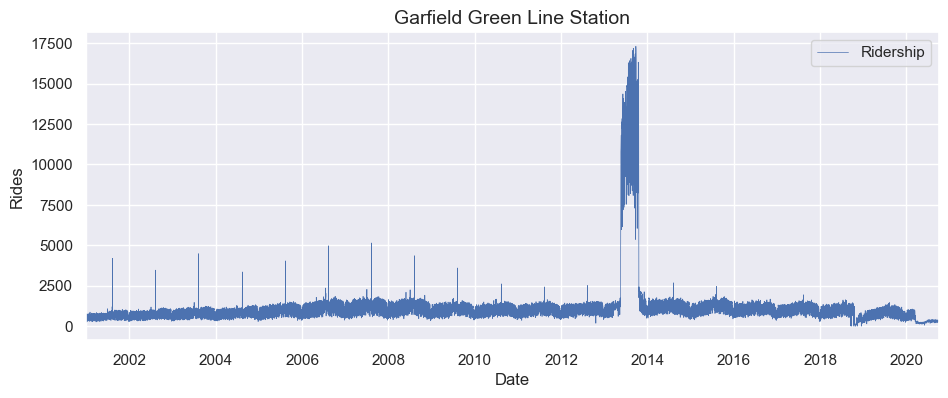

In [63]:
# select rides from the Garfield Green Line station
garfield_green = rides_by_date[rides_by_date['stationname'] == 'Garfield-South Elevated']

# plot the rides using the Pandas plot method
garfield_green['rides'].plot(linewidth=0.5)

# Label the plot
plt.ylabel("Rides")
plt.xlabel("Date")
plt.title('Garfield Green Line Station', fontsize=14)
plt.legend(["Ridership"])
plt.show()
# There are many more matplotlib functions for making plots prettier. 
# The Matplotlib documentation has examples of their use, and we will see more in future class exercises

This indicates that something unusual may have happened near the Garfield Green Line in the early part of 2014...that or there was a problem with the data collection during that period that resulted in inflated ridership counts

### 3.2 A More Complicated Plot

The above plot is realtively simple and doesn't make full use of some of the nice ways to plot data. Below walks through a more involved plot. Our aim is to see how rides are distributed over time across lines with differing use and to see how daytype interacts with ridership. 

#### 3.2.1 Custom Groupby and Adding New Column


Wouldn't it be cool to plot ridership across the years by line. However, there's a small problem. 

In [64]:
len(df['stationname'].unique())

148

As you can see, there are a crazy number of lines. Something like 4 groups would be easier to plot, right? To do that, we need to bin our data. Let's first copy our data so we don't change the DataFrame we already loaded. We will group by station, sum the rides, and apply qcut to bin the data into four equally sized groups. 

In [65]:
custom = df.copy()
groups = custom.groupby(['stationname'])['rides'].sum().to_frame().apply(lambda x: pd.qcut(x, 4, labels=range(1,5))).reset_index()

Let's see if we successfully made equally sized groups: 

In [80]:
groups.groupby(['rides'], observed = False).count()

,stationname
rides,
1,37
2,37
3,37
4,37


Let's add this label to our larger data using map. 

In [68]:
mapping = dict(groups.to_records(index=False))
custom['freq'] = custom['stationname'].map(lambda x: mapping[x])

#### 3.2.1 Facet Plots


Let's plot our data by grouping by frequency bin. We will use relplot, but FacetGrid is the more generic way of achieiving this. We will first aggregate our data by frequency bin. Aggregrate allows us to do custom operations to columns in our dataframe. Here we sum rides and take the first stationname for the relevant grouping as the stationname.

In [69]:
plot_data = custom.groupby(['freq', 'date', 'daytype']).agg({'rides': 'sum', 'stationname': 'first'}).reset_index()

In [70]:
plot_data.head()

,freq,date,daytype,rides,stationname
0,1,2001-01-01,U,5017,East 63rd-Cottage Grove
1,1,2001-01-02,W,22508,Main
2,1,2001-01-03,W,24686,East 63rd-Cottage Grove
3,1,2001-01-04,W,25224,47th-South Elevated
4,1,2001-01-05,W,25989,43rd


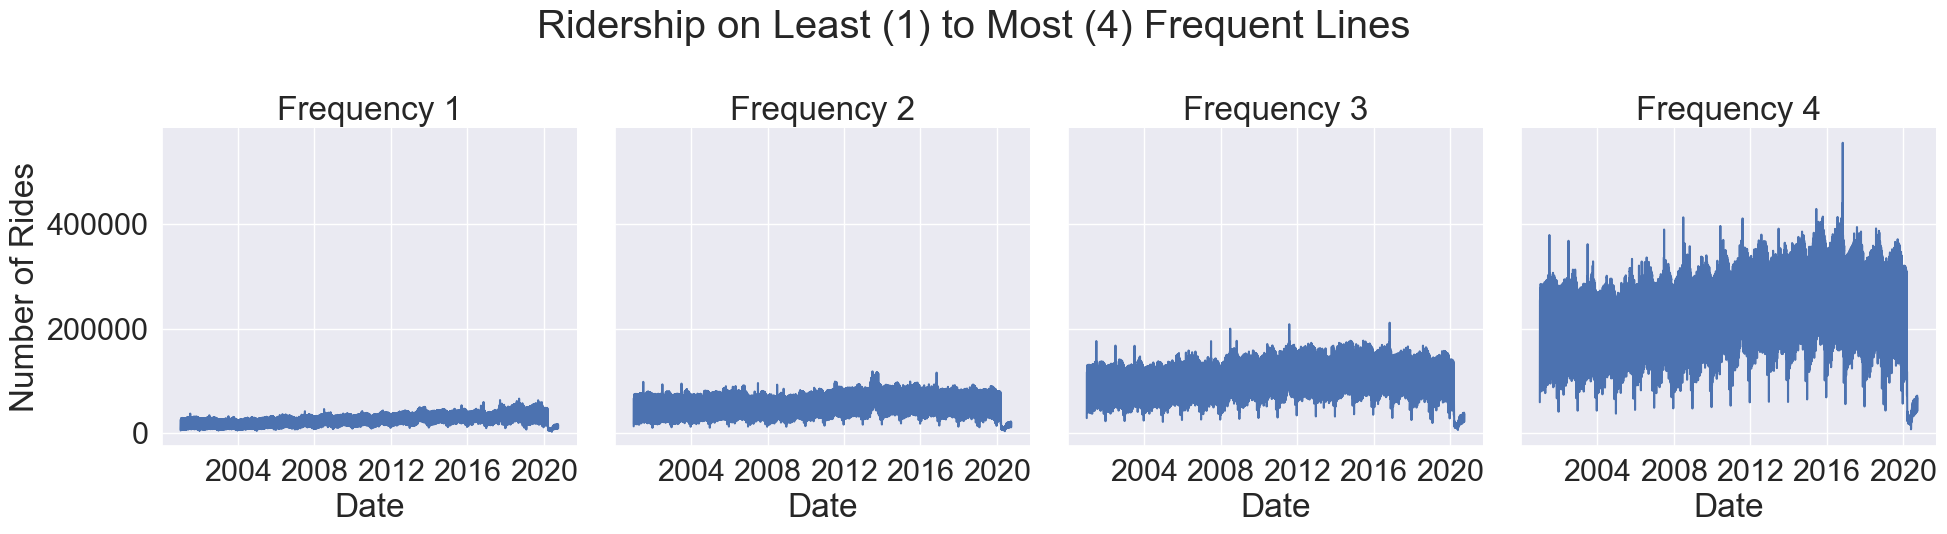

In [72]:
sns.set(font_scale=2)

g = sns.relplot(
    data=plot_data, x="date", y="rides",
    col="freq",  kind="line"
)
g.set_ylabels("Number of Rides")
g.set_xlabels("Date")
g.set_titles("Frequency {col_name}")
g.fig.suptitle("Ridership on Least (1) to Most (4) Frequent Lines", y=1.1)
plt.show()

It's a bit hard to see things when they are all on the same row. Let's use col_wrap to change up the layout.

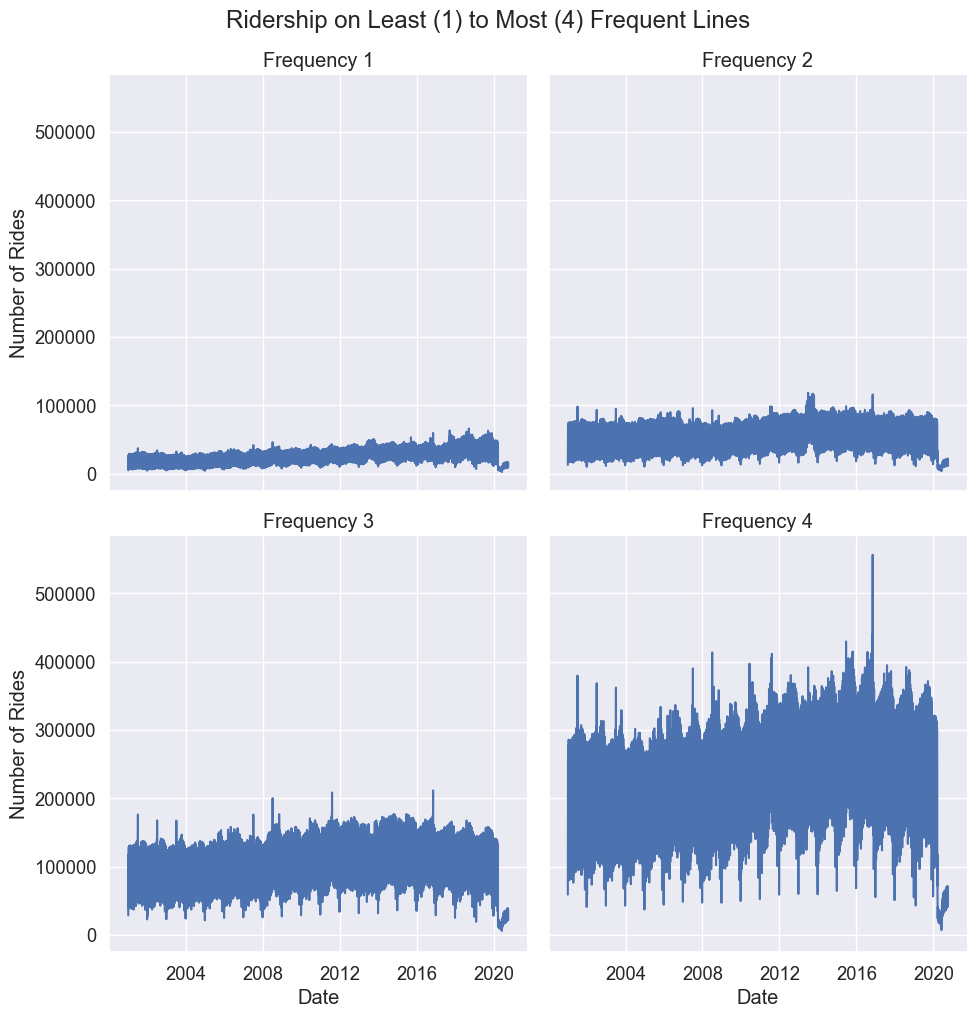

In [78]:
sns.set(font_scale=1.2)

g = sns.relplot(
    data=plot_data, x="date", y="rides",
    col_wrap=2,
    col="freq",  kind="line"
)
g.set_ylabels("Number of Rides")
g.set_xlabels("Date")
g.set_titles("Frequency {col_name}")
g.fig.suptitle("Ridership on Least (1) to Most (4) Frequent Lines", y=1.02)
plt.show()

#### 3.2.1 Using Hue


Sometimes, we may want to include a contrast in our plot. Let's try that by focusing in on the most frequent bin of stations and see how day type may influence ridership.

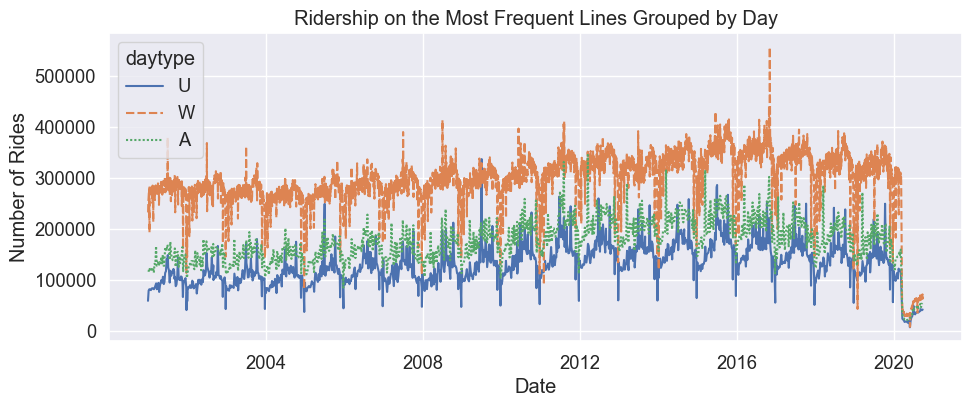

In [76]:
g = sns.lineplot(data=plot_data[plot_data['freq'] == 4], 
                 x="date", y="rides", hue="daytype", style="daytype")

g.set(xlabel='Date', ylabel='Number of Rides', title="Ridership on the Most Frequent Lines Grouped by Day")
plt.show()

You can even combine these plot features!

# 4. Try It Yourself

In this section, you will try writing your own code to answer the following questions about the CTA ridership data. Your code should print the answer to the questions with as little extra "fluff" as possible

#### 4.1 What is the number of rows and columns in the data set? 

This is a repeat from above, but it is crucial to understanding the data

In [4]:
plot_data = pd.read_csv("cta-ridership.csv")
print(plot_data.shape)

(1028040, 5)


#### 4.2 What are the start and end dates of the rides in the data set?

It is typically important to understand basic information about the data, such as when it starts and ends. Performing these kinds of basic sanity checks on the data is critical and something you should always do when exploring a new dataset.

In [5]:
print(np.min(plot_data['date']))
print(np.max(plot_data['date']))

01/01/2001
12/31/2019


#### 4.3 What are the five stations with the most total rides?


In [30]:
station_groups = plot_data.groupby(['stationname'])['rides'].sum()
sorted = station_groups.sort_values(ascending=False)
print(sorted.head(5))

stationname
Lake/State            99222100
Clark/Lake            99216310
Chicago/State         90889052
Belmont-North Main    73577908
95th/Dan Ryan         73358090
Name: rides, dtype: int64


#### 4.4 What is the average number of rides per day for the W daytype?

In [9]:
w_days = plot_data[plot_data["daytype"] == "W"]
print(w_days['rides'].mean())


3827.0251945216464


#### 4.5 Data Exploration on Your Own

Pick a simple question or hypothesis related to the ridership data, justify **why** you picked that question (i.e., why it might be an interesting question to some audience, such as city officials), and present a simple analysis including a plot. 

For my question, I want to see which days of the week are the most popular. Knowing this, city officials could allocate extra resources on given days of the week to help mantain optimal levels. In a real world scenario, I would want to create unique cases for holidays, though for the sake of "simplicity" I will just be sorting into Monday-Sunday. Ended up taking a lot longer than anticipated

In [77]:
min = np.min(plot_data['date'])
max = np.max(plot_data['date'])
s = pd.date_range(min, max, freq='D').to_series()
clone = plot_data.copy()
#print(s.dt.dayofweek)
new_columns_df = pd.DataFrame(s.dt.dayofweek).reset_index() 
#result_df = pd.concat([clone, new_columns_df], axis=1)
#groups = custom.groupby(['date'])['rides'].sum().to_frame().apply(lambda x: pd.qcut(x, 4, labels=range(1,5))).reset_index()
#print(new_columns_df['index'])
new_columns_df['index'] = new_columns_df['index'].dt.strftime('%Y-%m-%d')
#print(new_columns_df)

mapping = dict(new_columns_df.to_records(index=False))
#print(mapping)
clone['date'] = pd.to_datetime(clone['date'])
clone['date'] = clone['date'].dt.strftime('%Y-%m-%d')

#print(type(clone['date']))
#print(clone[clone['date'] == "2002-03-15"])
clone['day'] = clone['date'].map(lambda x: mapping.get(x, 7))
#print(clone.head())
print(clone[clone['day'] != 7])
#print(result_df)



         station_id       stationname        date daytype  rides  day
0             41280    Jefferson Park  2017-12-22       W   6104    4
1             41000  Cermak-Chinatown  2017-12-18       W   3636    0
2             40280      Central-Lake  2017-12-02       A   1270    5
3             40140   Dempster-Skokie  2017-12-19       W   1759    1
4             40690          Dempster  2017-12-03       U    499    6
...             ...               ...         ...     ...    ...  ...
1028035       40030      Pulaski-Lake  2008-07-03       W   2523    3
1028036       40760         Granville  2014-04-25       W   5085    4
1028037       40830              18th  2010-12-22       W   1464    2
1028038       40040      Quincy/Wells  2009-05-13       W   7269    2
1028039       41240    Addison-O'Hare  2004-10-01       W   3099    4

[988858 rows x 6 columns]


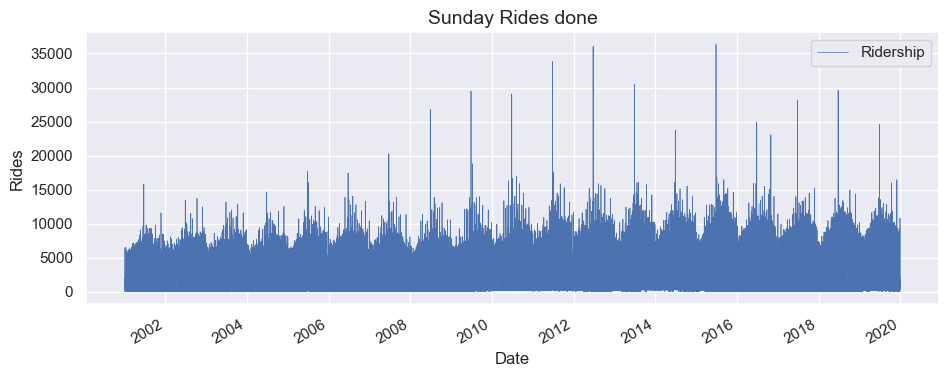

In [82]:
#new code to modify
rides_by_date = clone.sort_values(by='date')
Sunday = clone[clone['day'] == 6].copy()
Sunday['date'] = pd.to_datetime(Sunday['date'])
Sunday.set_index('date', inplace = True)
Sunday['rides'].plot(linewidth=0.5)

plt.ylabel("Rides")
plt.xlabel("Date")
plt.title('Sunday Rides done', fontsize=14)
plt.legend(["Ridership"])
plt.show()

# YOUR CODE HERE (add cells below as needed)

In [88]:
secondcopy = clone.copy()
groups = secondcopy.groupby('day')
groups.count()

,station_id,stationname,date,daytype,rides
day,,,,,
0,141373,141373,141373,141373,141373
1,141371,141371,141371,141371,141371
2,141230,141230,141230,141230,141230
3,141214,141214,141214,141214,141214
4,141216,141216,141216,141216,141216
5,141231,141231,141231,141231,141231
6,141223,141223,141223,141223,141223
7,39182,39182,39182,39182,39182


In [92]:
rides_per_day = groups['rides'].sum()
print(rides_per_day)

day
0    516249069
1    554080319
2    554939570
3    552024903
4    551503253
5    320696072
6    236328541
7     52270135
Name: rides, dtype: int64


In [120]:
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'magenta']
days = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = (10,6))
print(secondcopy.day)



date
2017-12-22    4
2017-12-18    0
2017-12-02    5
2017-12-19    1
2017-12-03    6
             ..
2008-07-03    3
2014-04-25    4
2010-12-22    2
2009-05-13    2
2004-10-01    4
Name: day, Length: 1028040, dtype: int64


<Figure size 1000x600 with 0 Axes>

In [135]:
#import matplotlib.dates as mdates couldn't get graph dates plotted right, not sure error

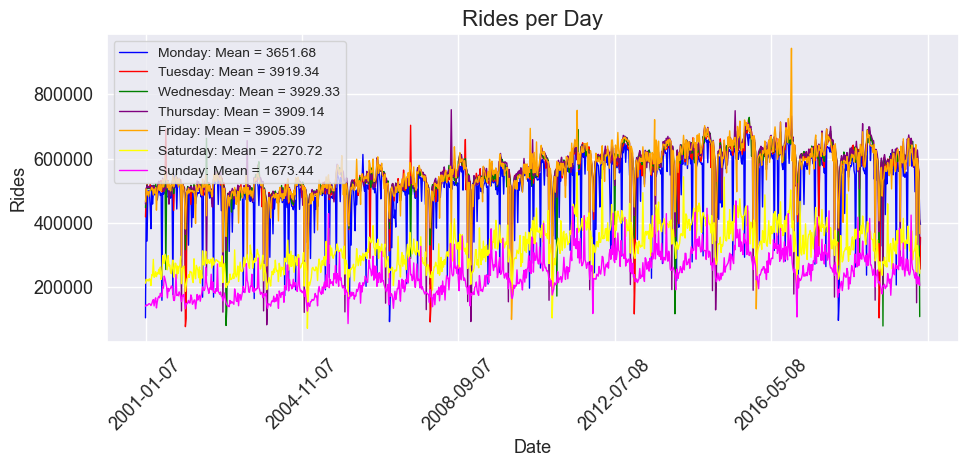

In [146]:
for i in range(7):
    daydata = secondcopy[secondcopy['day'] == i]
    dailysum = daydata['rides'].groupby(level = 0).sum()
    totalmean = daydata['rides'].mean()
    #print(daydata['rides'].head())
    #print(dailysum.head())
    dailysum.plot(
        kind = 'line',
        linewidth = 1,
        color = colors[i],
        label = f'{days[i]}: Mean = {totalmean:.2f}'
    )
#locater = mdates.YearLocator(base = 3) //couldn't get to work properly
#plt.gca().xaxis.set_major_locator(locater) //same w this
plt.title("Rides per Day", fontsize = 16)
plt.xlabel("Date", fontsize = 13)
plt.ylabel("Rides", fontsize = 13)
plt.legend(loc = 'best', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

